In [15]:
import langchain as lc
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,)

from langchain_core.messages import SystemMessage, HumanMessage


In [16]:
system_prompt = """
You have a dataset containing stock information for various companies. Each row in the dataset represents the stock details for a specific company.

The dataset contains the following columns:

- `StockID` (integer): The unique identifier for the stock.
- `CompanyName` (character): The name of the company associated with the stock.
- `Sector` (character): The sector or industry in which the company operates.
- `LastClose(EUR)` (float): The last closing price of the stock in Euros.
- `52WeekHigh(EUR)` (float): The highest price the stock has reached in the past 52 weeks, in Euros.
- `52WeekLow(EUR)` (float): The lowest price the stock has reached in the past 52 weeks, in Euros.
- `MarketCap(Billion EUR)` (float): The market capitalization of the company in billion Euros.

In this dataset, you can expect to find information about the stock performance, company details, and financial metrics for each company."""

In [17]:
user_prompt = "Suggest a single data analysis question that could be answered with this dataset"

In [18]:
messages_langchain = [
    SystemMessage(content=f"You are an expert in data science.\n {system_prompt}"),
    HumanMessage(content=f"{user_prompt}")
]

In [19]:
chat = ChatOpenAI(temperature=0)
response = chat(messages_langchain)

In [20]:
response

AIMessage(content='What is the average market capitalization of companies in each sector?')

In [30]:
print(type(response))

<class 'langchain_core.messages.ai.AIMessage'>


In [31]:
response_string = response.content

In [32]:
next_message = "So what is the min and max market capitalization in each sector?"
next_human_message = HumanMessage(content=next_message)

In [33]:
message02 = messages_langchain + [ #the variable with the list of previous SystemMessage and HumanMessage
    response, #the output we got from the previous turn in the conversation
    next_human_message #the next HumanMessage
]

In [34]:
response02 = chat(message02)

In [52]:
display(Markdown(response02.content))

To find the minimum and maximum market capitalization in each sector, you can perform the following analysis:

1. Group the dataset by the "Sector" column.
2. Calculate the minimum and maximum market capitalization for each sector.

Here is an example code snippet in Python using pandas library to perform this analysis:

```python
import pandas as pd

# Read the dataset
df = pd.read_csv("stock_data.csv")

# Group the dataset by sector and calculate the min and max market capitalization
sector_market_cap = df.groupby("Sector")["MarketCap(Billion EUR)"].agg(["min", "max"])

# Print the result
print(sector_market_cap)
```

This code will output a table with the minimum and maximum market capitalization for each sector in the dataset.

In [38]:
next_message03 = "Add some matplotlib code to show the data"
next_human_message03 = HumanMessage(content=next_message03)

message03 = message02 + [
    response02,
    next_human_message03
]

response03 = chat(message03)

content='To find the minimum and maximum market capitalization in each sector, you can perform the following analysis:\n\n1. Group the dataset by the "Sector" column.\n2. Calculate the minimum and maximum market capitalization for each sector.\n\nHere is an example code snippet in Python using pandas library to perform this analysis:\n\n```python\nimport pandas as pd\n\n# Read the dataset\ndf = pd.read_csv("stock_data.csv")\n\n# Group the dataset by sector and calculate the min and max market capitalization\nsector_market_cap = df.groupby("Sector")["MarketCap(Billion EUR)"].agg(["min", "max"])\n\n# Print the result\nprint(sector_market_cap)\n```\n\nThis code will output a table with the minimum and maximum market capitalization for each sector in the dataset.'


In [48]:
import pandas as pd
import plotly.express as px
from IPython.display import display, Markdown

In [51]:
display(Markdown(response03.content))

Certainly! Here's an example of how you can visualize the minimum and maximum market capitalization for each sector using matplotlib:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("stock_data.csv")

# Group the dataset by sector and calculate the min and max market capitalization
sector_market_cap = df.groupby("Sector")["MarketCap(Billion EUR)"].agg(["min", "max"])

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the minimum market capitalization
ax.bar(sector_market_cap.index, sector_market_cap["min"], label="Minimum Market Cap")

# Plotting the maximum market capitalization
ax.bar(sector_market_cap.index, sector_market_cap["max"], label="Maximum Market Cap")

# Adding labels and title
ax.set_xlabel("Sector")
ax.set_ylabel("Market Capitalization (Billion EUR)")
ax.set_title("Minimum and Maximum Market Capitalization by Sector")

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Adding legend
ax.legend()

# Display the plot
plt.show()
```

This code will generate a bar chart showing the minimum and maximum market capitalization for each sector. The x-axis represents the sectors, and the y-axis represents the market capitalization in billion Euros. Each sector will have two bars, one for the minimum market capitalization and one for the maximum market capitalization.

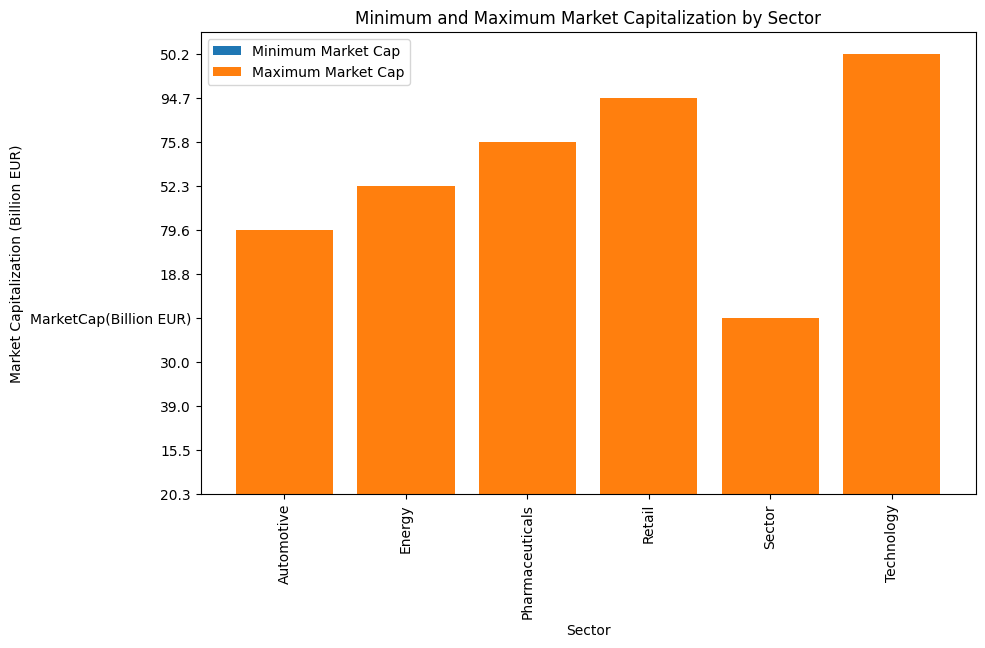

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("stock_data.csv")

# Group the dataset by sector and calculate the min and max market capitalization
sector_market_cap = df.groupby("Sector")["MarketCap(Billion EUR)"].agg(["min", "max"])

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the minimum market capitalization
ax.bar(sector_market_cap.index, sector_market_cap["min"], label="Minimum Market Cap")

# Plotting the maximum market capitalization
ax.bar(sector_market_cap.index, sector_market_cap["max"], label="Maximum Market Cap")

# Adding labels and title
ax.set_xlabel("Sector")
ax.set_ylabel("Market Capitalization (Billion EUR)")
ax.set_title("Minimum and Maximum Market Capitalization by Sector")

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Adding legend
ax.legend()

# Display the plot
plt.show()

### Create a txt file to convey insights from the data

In [53]:
#create a list with all the lines in the csv file
with open('stock_data.csv', 'r') as file:
    # Read the file line by line
    lines = file.readlines()

['StockID,CompanyName,Sector,LastClose(EUR),52WeekHigh(EUR),52WeekLow(EUR),MarketCap(Billion EUR)\n',
 'StockID,CompanyName,Sector,LastClose(EUR),52WeekHigh(EUR),52WeekLow(EUR),MarketCap(Billion EUR)\n',
 '101,AlphaTech,Technology,120.5,130.0,100.0,50.2\n',
 '102,BetaMotors,Automotive,58.3,62.5,50.0,20.3\n',
 '103,GammaEnergy,Energy,33.2,40.0,25.0,15.5\n',
 '104,DeltaPharma,Pharmaceuticals,144.7,150.0,130.0,60.1\n',
 '105,EpsilonRetail,Retail,89.0,95.0,80.0,30.0\n',
 '131,Company131,Retail,134.45,86.99,85.33,94.7\n',
 '132,Company132,Automotive,198.46,230.49,71.94,34.4\n',
 '133,Company133,Pharmaceuticals,24.98,178.12,58.81,75.8\n',
 '134,Company134,Energy,79.04,42.86,109.07,52.3\n',
 '135,Company135,Pharmaceuticals,99.15,230.07,107.62,39.0\n',
 '161,Company161,Technology,145.67,224.04,79.09,18.8\n',
 '162,Company162,Automotive,99.41,210.08,138.47,55.9\n',
 '163,Company163,Automotive,192.59,194.81,37.24,73.7\n',
 '164,Company164,Pharmaceuticals,26.16,97.28,97.39,43.5\n',
 '165,Company1

In [59]:
# create s system prompt that helps to generate insights from the data

system_prompt = """ #str
You are a data scientist who works writing report about data
You do the insights, writing paragraphs that illustrates the main outcomes from the data
You will write just a sentece per company analized
Make sure you include mock judgements that can be later analyzed with sentiment analysis

For example:

OmegaPharamcy has an awful year, with 4EUR  52 Week Low and just 5EUR 52Week High
BootleOfWatter present amazing results, with a market capitalization of 90 billon EUR, 30% higher than the previous year
"""

user_prompt = "".join(lines) #str

In [60]:
langchain_messages_01 = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt)
]

In [ ]:
#create the chat variable

chat_02 = ChatOpenAI(temperature=0.99) #from langchain create a chat


In [62]:
response_01 = chat(langchain_messages_01)

In [71]:
response_content = response_01.content


In [72]:
written_report = response_content.split("\n")
written_report

['AlphaTech had a successful year, with a 52 Week High of 130.0 EUR and a market capitalization of 50.2 billion EUR.',
 'BetaMotors had a decent year, with a 52 Week High of 62.5 EUR and a market capitalization of 20.3 billion EUR.',
 'GammaEnergy struggled, with a 52 Week High of 40.0 EUR and a 52 Week Low of 25.0 EUR.',
 'DeltaPharma performed well, with a 52 Week High of 150.0 EUR and a market capitalization of 60.1 billion EUR.',
 'EpsilonRetail had a stable year, with a 52 Week High of 95.0 EUR and a market capitalization of 30.0 billion EUR.']

In [73]:
with open("financial_report.txt", "w") as financial_report_txt:
    for line in written_report:
        financial_report_txt.write(line + "\n")